# Основе обраде и приказа табеларних података

Обраду, анализу и графички приказ података је тешко раздвојити. Све то углавном иде паралелно. У Пајтону постоји неколико најчешће коришћених библиотека које су усаглашене тако да објекти које користимо за обраду података имају функције за цртање, а функције за цртање враћају табеле и серије. Зато је то овде једна лекција.

## Обрада табеларних података

Много тога за шта су нам потребни програмерско знање и труд при обради података у листама постаје једноставна примена готових функција када податке спакујемо у _DataFrame_. На тај начин нам библиотека _pandas_ омогућава да рад са табелама буде једноставан, брз и ефикасан. 

### Учитавање табеле из датотеке

Податке најчешће чувамо у табелама. Чак су и базе података само колекције различитих табела. За поновну употребу табеле снимамо у датотеке (или фајлове, како их понекад зовемо). Те снимљене табеле касније учитавамо по потреби. Уобичајени формат датотека за снимање табела је CSV (енгл. _comma separated value_, тј. вредности одвојене зарезом). Библиотека _pandas_ има функције за учитавање и снимање табела. За учитавање користимо функцију `pd.read_csv()`. Aргумент ове функције је стринг са локацијом и називом датотеке, нпр. "data/preostala-mesta-skole.csv". 

Ова датотека се не налази у Пајтоновом радном директоријуму већ у поддиректоријуму _data_, због чега је потребно да то напишемо и да назив директоријума и датотеке раздвојимо косом цртом. Учитаћемо сада баш ту датотеку. У њој се налази листа средњих школа у Србији где је наведено колико је било слободних места за упис после првог круга уписа 2022. године.

In [1]:
import pandas as pd                # prvo uvozimo pandas biblioteku
import matplotlib.pyplot as plt    # i biblioteku za crtanje grafika

In [2]:
dt = pd.read_csv('data/preostala-mesta-skole.csv')

При позивању функција из одређене библиотеке потребно је да наведемо ознаке библиотека. Зато није довољно да напишемо `read_csv()` већ морамо `pd.read_csv()`. При увожењу библиотека ми смо нагласили да ћемо користити скраћена имена уместо пуних. Користићемо `pd` уместо `pandas` и `plt` уместо `matplotlib.pyplot` што ће нам олакшати писање кôда.

Садржај датотеке смо учитали и сместили у табелу (тачније променљиву типа _dataframe_) `dt`. Да бисмо видели шта је учитано, згодно је да прикажемо на екрану заглавље те табеле са првих неколико редова. За то нам служи функција `.head()`.

In [3]:
dt.head()

,Општина,Школа,Мин. бодова,Укупно места,Преостало места
0,Ада,"Техничка школа, Ада",39.37,150,78
1,Александровац,"Средња школа ""Свети Трифун"" са домом ученика, ...",42.77,90,48
2,Алексинац,"Алексиначка гимназија, Алексинац",63.19,90,29
3,Алексинац,"Биотехнолошка школа ""Шуматовац"", Алексинац",40.76,60,25
4,Алексинац,"Техничка школа ""Прота Стеван Димитријевић"", Ал...",50.16,30,1


Видимо да су у табели називи школа дати по врстама, а да по колонама имамо основне податке о упису у тим државама. У колони __Општина__ је име општине у којој се налази школа, __Школа__ означава назив школе са именом места, __Мин. бодова__ представља најмањи број бодова са којим се у тој школи у првом кругу неко уписао, __Укупно места__ означава број одобрених места, а __Преостало места__ је број непопуњених места у тој школи. Називе свих колона можемо да добијемо помоћу `dt.columns`.

In [4]:
dt.columns

Index(['Општина', 'Школа', 'Мин. бодова', 'Укупно места', 'Преостало места'], dtype='object')

Вредности које се налазе у одређеној колони се позивају тако што после имена табеле у угластим заграда наведемо име колоне под једноструким или двоструким наводницима. Да бисмо приказали колону са именима држава, написаћемо `dt['Школа']` или `dt["Школа"]`.

In [5]:
dt['Школа']

0                                    Техничка школа, Ада
1      Средња школа "Свети Трифун" са домом ученика, ...
2                       Алексиначка гимназија, Алексинац
3             Биотехнолошка школа "Шуматовац", Алексинац
4      Техничка школа "Прота Стеван Димитријевић", Ал...
                             ...                        
338                               Техничка школа , Шабац
339                             Шабачка гимназија, Шабац
340                      Гимназија "Сава Шумановић", Шид
341                   Техничка школа "Никола Тесла", Шид
342    Економско-трговинска школа "Јован Цвијић", Штрпце
Name: Школа, Length: 343, dtype: object

Ако хоћете да видите само део ове листе, користите слајсове. Са `[:10]` ћете нпр. добити првих 10, а са `[10:20]` других 10 елемената колоне, а са `[10:0:-1]` првих десет у обрнутом редоследу.

In [6]:
dt['Школа'][10:20]

10                  Средња школа "Свети Ахилије", Ариље
11    Средња школа "Вук Караџић" са домом ученика, Б...
12                        Техничка школа , Бајина Башта
13                               Средња школа, Барајево
14                Средња школа "Никола Тесла", Баточина
15                             Пољопривредна школа, Бач
16               Гимназија "20. октобар", Бачка Паланка
17    Средња стручна школа "Др Радивој Увалић", Бачк...
18               Техничка школа "9. мај", Бачка Паланка
19    Гимназија и економска школа "Доситеј Обрадовић...
Name: Школа, dtype: object

### Сортирање

Библиотека _pandas_ има прегршт корисних функција за рад са табелама и њиховим колонама. Функција `.sort_values()` сортира све вредности у одређеној колони и прерасподељује садржај осталих колона у складу са тим. Аргумент ове функције је назив колоне по којој хоћемо да сортирамо табелу. Подразумева се да се сортирање ради од најмање до највеће вредности. Уколико нам то не одговара и хоћемо сортирање у супротном смеру, потребно је да наведемо и други аргумент: `ascending=False`. То буквално значи да не сортира у растућем (енгл. _ascending_) редоследу. Примера ради, ако хоћемо да видимо у које су се школе ученици уписивали са најмањим и највећим бројем бодова, можемо да сортирамо вредности по тој колони и погледамо које се школе налази на почетку и крају табеле.

In [7]:
dt.sort_values('Мин. бодова')

,Општина,Школа,Мин. бодова,Укупно места,Преостало места
244,Пријепоље,"Техничка школа , Пријепоље",28.73,105,52
69,Вучитрн,"Техничка школа ""Никола Тесла"" , Прилужје",30.16,60,44
272,Сјеница,Техничко - пољопривредна школа са домом ученик...,30.47,75,41
165,Лесковац,"Школа за текстил и дизајн, Лесковац",31.71,90,59
68,Вршац,"Школски центар ""Никола Тесла"", Вршац",33.39,30,7
...,...,...,...,...,...
228,Пећ,"Економско-трговинска школа ""Милева Вуковић"", Г...",75.44,60,56
93,Зрењанин,"Зрењанинска гимназија, Зрењанин",79.25,30,24
90,Земун,"Школа за ученике оштећеног вида ""Вељко Рамадан...",NaN,12,12
206,Нови Сад,"Школа за основно и средње образовање ""Милан Пе...",NaN,12,12


__Задатак 1__: Сортирате табелу `dt` у по укупном броју места у школама од највеће до најмање вредности.

Видимо да има школа где се ученици са тридесетак бодова успешно уписују, али да има и оних такав податак уопште није наведен. Ту се у табели појављује ознака `NaN`. Ако пажљивије погледамо табелу, видећемо да су школе за које немамо податак о минималном броју бодова школе за ученике са тешкоћама у развоју. То је вероватно разлог зашто број бодова није био критеријум по ком су ученици уписивани. 

Табеле са великим бројем редова нису прегледне чак ни када их сортирамо. Зато је пожељно да направимо графички приказ који би нам помогао у тумачењу података. Овде ћемо дати примере два типа дијаграма (стубичасти дијаграм и хистограм) за приказ колона са бројем становника и површином држава. 

Прво дајемо стубичасти дијаграм. Аргументи функције су ознаке стубића (име школе) и дужина стубића (минимални број бодова). Пошто школа у табели има преко 200, тешко је направити прегледан график са свим школама. Зато смо узели само  првих двадесет школа са највећим бројем бодова последњег уписаног ученика.

Због прегледности исписа згодније нам је да стубићи буду хоризонтални. Зато користимо функцију `barh()` уместо `bar()`. Пробајте и са `bar()` да видите како би изгледало.

<BarContainer object of 20 artists>

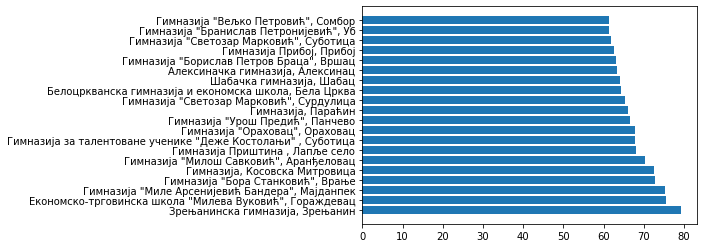

In [8]:
spd=dt.sort_values('Мин. бодова', ascending=False)   # sortiramo tabelu po min. broju bodova i dodeljujemo je novoj tabeli
spd20=spd[:20]                                       # zbog preglednosti, pomoću slajsa, izdvajamo samo prvih 20 redova
plt.barh(spd20['Школа'],spd20['Мин. бодова'],)       # crtamo horizontalni stubičasti dijagram 

__Задатак 2__: Напишите кôд који исписује имена десет школа са најмањим бројем преосталих места.

Други важан тип графикона за приказ расподеле података је хистограм. Он нам приказује колико се пута у одређеном низу појављује вредност из тачно одређених интервала вредности. На пример, хистограм може да нам прикаже број школа по интервалима вредности за број преосталих места. Функција `.hist()` дели интервал од најмање до највеће вредности на десет једнаких под-интервала уколико не наведемо конкретан број интервала као други аргумент функције и распон одакле докле желимо хистограм као трећи аргумент. Сада ћемо приказтаи само ову основну варијанту са једним аргуметном. Нешто касније ћете видети и како то изгледа са три.

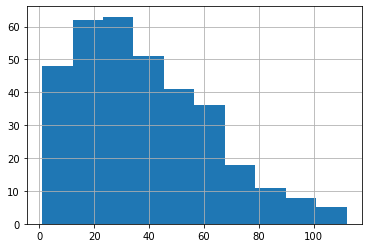

In [9]:
plt.hist(dt['Преостало места'])
plt.grid()                         # crtanje mreže na grafiku

### Филтрирање табеле

Филтрирање значи да од целе табеле желимо да издвојимо само оне редове који нас интересују. За филтрирање података у табели користимо критеријуме, односно логичке исказе као што је нпр. `dt['Општина']=="Крагујевац"`. Овде проверавамо које су вредности у колони `dt['Општина']` једнаке стрингу `"Крагујевац"`. У угласте заграде после назива табеле треба унети тражени критеријум. На тај начин од целе почетне табеле издвајамо само онај део табеле где је критеријум испуњен.

In [10]:
dt[dt['Општина']=="Крагујевац"]

,Општина,Школа,Мин. бодова,Укупно места,Преостало места
130,Крагујевац,"Прва техничка школа, Крагујевац",55.23,30,22
131,Крагујевац,"Средња стручна школа, Крагујевац",41.35,150,101
132,Крагујевац,"Трговинско-угоститељска школа ""Тоза Драговић"",...",42.16,180,89


Слично можемо да издвојимо све школе у којима је остало више од стотину слободних места. Шта мислите колико их има?

In [11]:
dt[dt['Преостало места']>100]

,Општина,Школа,Мин. бодова,Укупно места,Преостало места
131,Крагујевац,"Средња стручна школа, Крагујевац",41.35,150,101
200,Нови Сад,"Пољопривредна школа са домом ученика ""Футог"", ...",43.94,180,112
213,Палилула (Београд),"Железничка техничка школа, Београд (Палилула)",50.27,210,111
310,Темерин,"Средња школа ""Лукијан Мушицки"", Темерин",37.87,180,104
335,Чукарица,"Хемијско-прехрамбена технолошка школа, Београд...",40.56,210,108


__Задатак 3__: Напишите кôд који издваја редове табеле `dt` где је број преосталих места мањи или једнак 5.

## Статистички и графички приказ табеларних података

У табели типа _dataframe_ можемо да имамо различите типове података. Битно је само да су у једној колони сви подаци истог типа. Два најважнија типа података, заправо групе типова су номинални (или категоријални, како их понекад зовемо) и нумерички подаци. Номинални подаци означавају нека имена, називе или кратке текстуалне описе. Имена општина представљају номиналне податке. Већина номиналних података су стрингови који означавају различите објекте. Једина статистика коју можемо да радимо са номиналним подацима јесте да пребројимо колико их има, тј. да видимо колико се често појављују.

У табели `dt` имамо колону са именом општине у којој се школа налази. Ако бисмо пребројали колико се пута појављују ови подаци, видели бисмо колико различитих школа имамо у којој општини. Библиотека _pandas_ нам омогућава да то радимо помоћу функције `.value_counts()` коју применимо на одговарајућу колону. 

In [12]:
vc=dt['Општина'].value_counts()
print(vc)

Нови Сад       10
Лесковац        8
Суботица        7
Зрењанин        6
Панчево         6
               ..
Кањижа          1
Ириг            1
Зубин Поток     1
Звечан          1
Штрпце          1
Name: Општина, Length: 165, dtype: int64


Функција `.value_counts()` враћа податак типа _Series_, односно индексирани низ вредности који дефинише _pandas_ библиотека. Индексима, односно називима појединачних елемената низа приступамо помоћу `<име серије>.index`, а вредностима елемената низа помоћу `<име серије>.values`. Конкретно, имена општина из серије `vc` позивамо са `vc.index`, док вредности које смо добили пребројавањем позивамо са `vc.values`.

In [13]:
vc.index

Index(['Нови Сад', 'Лесковац', 'Суботица', 'Зрењанин', 'Панчево', 'Медијана',
       'Сомбор', 'Врање', 'Приштина', 'Крушевац',
       ...
       'Костолац', 'Косјерић', 'Ковачица', 'Кнић', 'Кладово', 'Кањижа', 'Ириг',
       'Зубин Поток', 'Звечан', 'Штрпце'],
      dtype='object', length=165)

__Задатак 4__: Нацртајте стубичасти дијаграм који приказује број школа по општинама. Да би ознаке биле прегледне, узмите само неколико највећих вредности.

За разлику од номиналних вредности, нумеричке могу да се пореде међусобно по величини. Са бројевима могу да се раде и рачунске операције. Због тога су могућности за обраду и анализу нумеричких низова много веће него за низове номиналних података. Наш основни задатак је да цео низ података што једноставније и разумљивије представимо. Низ података често поједностављено приказујемо помоћу карактеристичних вредности, као што је нпр. средња вредност. Други важан начин је да цео низ података прикажемо графички како бисмо податке могли да "видимо".

### Описивање низова података преко карактеристичних вредности

За рачунање средње вредности се користи _pandas_ функција `.mean()` која се примењује на нумеричку колону у табели. Користећи табелу израчунаћемо средњу вредност броја преосталих места по школама.

In [14]:
dt['Преостало места'].mean()

38.221574344023324

Средња вредност броја преосталих места је приближно 38. Друга статистичка мера којом често описујемо низ бројева је медијана. Њу рачунамо помоћу _pandas_ функције `.median()`.

> __Медијана__ је математичка функција која нам даје средишњу вредност за низ који је сортиран по величини. Она дели низ на два дела са истим бројем елемената. Ако низ, на пример, садржи висине 101 ученика, медијана нам даје висину 51. највишег ученика. Од њега има 50 виших и 50 нижих, док је он у самој средини. Ако имамо паран број ученика, онда нема ученика који је баш у средини па се медијана рачуна мало другачије: као средња вредност висине првог елемента испод и првог изнад те средине. То значи да је медијана низа од 100 бројева, средња вредност 50. и 51. највеће вредности овог низа. 

In [15]:
dt['Преостало места'].median()

34.0

Уочите колика је разлика између средње вредности и медијане за број преосталих места. Средња вредност је углавном већа код свих низова података где има много малих и мало великих вредности.

Погледајте хистограм броја преосталих места по школама. Највише је оних где има двадесетак слободних места које видимо као високе стубиће са леве стране, док је са десне стране мањи број школа са много слободних места. Не улазећи даље у тумачење података, хоћемо само да покажемо да се средња вредност и медијана разликују. На графикону доле, црвеном линијом је обележена медијана, а наранџастом средња вредност. Пробајте сами да откријете шта ради која линија у програму.

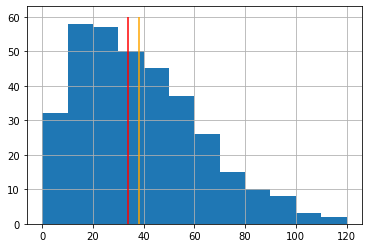

In [16]:
mArea=dt['Преостало места'].mean()
mdArea=dt['Преостало места'].median()
plt.hist(dt['Преостало места'],12,range=(0,120))   # interval od 0 do 119 delimo na 12 podintervala
plt.grid()
plt.vlines(mArea,0,60,colors='orange')
plt.vlines(mdArea,0,60,colors='red');

__Задатак 5__: Одредите средњу вредност и медијану за минимални број бодова по школама.

__Задатак 6__: Нацртајте хистограм минималног броја бодова по школама. 